In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
data = pd.read_csv("Results.csv", sep=',',encoding='utf-8')

fields = ['Pos','Bib No','Name','University','Time',
          'Cat Pos', 'Gender','Gen Pos','Run 1','G/Pos',
          'T1','Bike','G/Pos.1','T2','Run 2','G/Pos.2']

oxnames = []
oxidxs = []
camidxs = []
for idx in range(len(data)):
    if data["University"][idx] == 'OXFORD UNIVERSITY':
        oxnames.append(data['Name'][idx])
        oxidxs.append(idx)
    elif data["University"][idx] == 'UNIVERSITY OF CAMBRIDGE':
        camidxs.append(idx)

def secondCounter(timestr):
    timestr = str(timestr)
    if len(timestr) == 4:
        s = int(timestr[0:2])
    elif len(timestr) == 6:
        s = int(timestr[0])*60+int(timestr[2:4])
    elif len(timestr) == 7:
        s = int(timestr[0:2])*60+int(timestr[3:5])
    elif len(timestr) == 9:
        s = int(timestr[0])*3600 + int(timestr[2:4])*60+int(timestr[5:7])
    return s
    
    
def colToSeconds(field):
    dic = {}
    for i in range(len(data)):
        dic[i] = {field: secondCounter(data[field][i])}
    
    df = pd.DataFrame.from_dict(dic, "index")
    
    return df

for field in ["Run 1", "T1", "Bike", "T2", "Run 2", "Time"]:
    data[field] = colToSeconds(field)



In [80]:
def getRightData(name):
    idxs = []

    myidx = list(np.where(data["Name"] == name)[0])[0]
    for i in range(min(100,len(data)-myidx)):
        idxs.append(myidx+i-min(myidx//2,50))
        
    #idxs += oxidxs
    #idxs += camidxs
        
    results = data[fields].iloc[idxs]
    for field in ["Run 1",'T1', "Bike",'T2', "Run 2"]:
        avg = results[field].mean()
        results[field] = avg - results[field]
    
    
    results["Total after T1"] = results["Run 1"] + results["T1"]
    results["Total after Bike"] = results["Total after T1"] + results["Bike"]
    results["Total after T2"] = results["Total after Bike"] + results["T2"]
    results["Total after Run 2"] = results["Total after T2"] + results["Run 2"]

    myfigures(name, idxs, results)

def myfigures(name,idxs, results):
    
    x = ["Start","End of Run 1",'End of T1', "End of Bike",'End of T2', "End of Run 2"]
    
    inds = [0,10,14,30,34,44]

    plt.figure(4, figsize=(15,10))
    plt.title("Race Time")
    plt.ylabel("Time ahead relative to average")
    for idx in idxs:
        y = [0,results['Run 1'][idx], results['Total after T1'][idx], 
             results["Total after Bike"][idx], results['Total after T2'][idx], 
             results["Total after Run 2"][idx]]
        if results['Name'][idx] == name:
            plt.plot(inds,y,'red',linewidth=1)
        elif results["University"][idx] == "OXFORD UNIVERSITY":
            plt.plot(inds,y,'navy',linewidth=1)
        elif results["University"][idx] == "UNIVERSITY OF CAMBRIDGE":
            plt.plot(inds,y,'#A3C1AD',linewidth=1)
        else:
            plt.plot(inds,y,'gray', alpha=0.1,linewidth=1)
            
    x1, y1 = [inds[1], inds[1]], [-150, 150]
    plt.plot(x1, y1,'k', ':',linewidth=0.5)
    x2, y2 = [inds[2], inds[2]], [-150, 150]
    plt.plot(x2, y2,'k', ':',linewidth=0.5)
    x3, y3 = [inds[3], inds[3]], [-150, 150]
    plt.plot(x3, y3,'k', ':',linewidth=0.5)
    x4, y4 = [inds[4], inds[4]], [-150, 150]
    plt.plot(x4, y4,'k', ':',linewidth=0.5)
    plt.xticks(inds, x)
    plt.show()
    
    plt.figure(3, figsize=(15,10))
    for idx in idxs:
        y = [0,results['Run 1'][idx], results['T1'][idx]*10, 
             results["Bike"][idx], results['T2'][idx]*10, results["Run 2"][idx]]
        if results['Name'][idx] == name:
            plt.plot(inds,y,'red',linewidth=1)
        elif results["University"][idx] == "OXFORD UNIVERSITY":
            plt.plot(inds,y,'navy',linewidth=1)
        elif results["University"][idx] == "UNIVERSITY OF CAMBRIDGE":
            plt.plot(inds,y,'#A3C1AD',linewidth=1)
        else:
            plt.plot(inds,y,'gray', alpha=0.1,linewidth=1)
    plt.ylabel("Arbitraty measure of performance")
    plt.title("Individual discipline times")
    plt.xticks(inds, x)
    x1, y1 = [inds[1], inds[1]], [-300, 150]
    plt.plot(x1, y1,'k', ':',linewidth=0.5)
    x2, y2 = [inds[2], inds[2]], [-300, 150]
    plt.plot(x2, y2,'k', ':',linewidth=0.5)
    x3, y3 = [inds[3], inds[3]], [-300, 150]
    plt.plot(x3, y3,'k', ':',linewidth=0.5)
    x4, y4 = [inds[4], inds[4]], [-300, 150]
    plt.plot(x4, y4,'k', ':',linewidth=0.5)
    plt.show()

   






How to interpret the graphs:

1. A flat line = average performance (of the 100 athletes around you). Positive gradient = better, negative = worse

2. Height of point = performance for that particular part of the race: e.g. select Mat Veal - a great bike, a bad T2

In [81]:
widgets.interact(getRightData, name=oxnames);

interactive(children=(Dropdown(description='name', options=('Joe BOWNESS', 'Luke GRENFELL-SHAW', 'Andres NOE',…

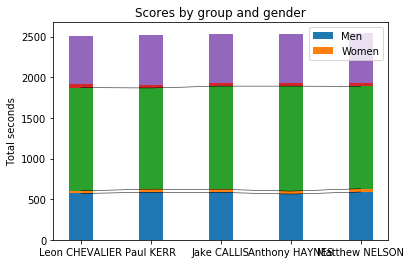

In [36]:
idxs=[0,1,2,3,4]
disciplines = ["Run 1","T1","Bike","T2","Run 2"]
names=data["Name"].iloc[idxs]
toplot = data[disciplines].iloc[idxs]
#for d in disciplines:
#    toplot[d] = toplot[d] / toplot[d].mean()
toplot['1+2'] = toplot["Run 1"] + toplot["T1"]
toplot['1+2+3'] = toplot["Bike"] + toplot["1+2"]
toplot['1+2+3+4'] = toplot["T2"] + toplot["1+2+3"]
toplot['1+2+3+4+5'] = toplot["Run 2"] + toplot["1+2+3+4"]
N = len(idxs)



    
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)

    
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, toplot["Run 1"], width)
p2 = plt.bar(ind, toplot["T1"], width,
             bottom=toplot["Run 1"])
p3 = plt.bar(ind, toplot['Bike'], width,
             bottom=toplot["1+2"])
p4 = plt.bar(ind, toplot['T2'], width,
             bottom=toplot["1+2+3"])
p5 = plt.bar(ind, toplot['Run 2'], width,
             bottom=toplot["1+2+3+4"])
p6 = plt.plot(ind,toplot["Run 1"], 'black', linewidth=0.5)
p7 = plt.plot(ind,toplot["1+2"], 'black', linewidth=0.5)
p8 = plt.plot(ind,toplot["1+2+3"], 'black', linewidth=0.5)

plt.ylabel('Total seconds')
plt.title('Scores by group and gender')
plt.xticks(ind, names)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()